In [6]:
!pip install graphviz

In [8]:
#Step 1: Import necessary libraries
# We import all required libraries to work with data and build our models.

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: For tree visualization
import graphviz 
from sklearn.tree import export_text


In [10]:
#Step 2: Load the dataset
# Replace the path with your dataset path. We assume this is a Heart Disease dataset (classification task).

df = pd.read_csv("heart.csv")  # Replace with actual path if needed

# Display the first 5 rows to understand structure
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [12]:
# Step 3: Check for missing values and data types
# This helps ensure that the dataset is clean and suitable for modeling.

df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [14]:
# Step 4: Separate features and target variable
# 'target' is usually the column we want to predict in heart disease datasets.
X = df.drop("target", axis=1)  # Features
y = df["target"]               # Target

In [16]:
# Step 5: Split the dataset into train and test sets
# We keep some data aside for testing model performance.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
#Step 6: Train a Decision Tree Classifier
# This is a basic tree model which we’ll visualize and analyze.

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [22]:
# Step 7: Visualize the Decision Tree
# This helps understand how the model is making decisions (splits).

tree_rules = export_text(dt_model, feature_names=list(X.columns))
print(tree_rules)


|--- cp <= 0.50
|   |--- ca <= 0.50
|   |   |--- thal <= 2.50
|   |   |   |--- exang <= 0.50
|   |   |   |   |--- thalach <= 96.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- thalach >  96.50
|   |   |   |   |   |--- chol <= 316.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- chol >  316.50
|   |   |   |   |   |   |--- slope <= 1.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- slope >  1.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |--- exang >  0.50
|   |   |   |   |--- thalach <= 146.00
|   |   |   |   |   |--- trestbps <= 115.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- trestbps >  115.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- thalach >  146.00
|   |   |   |   |   |--- oldpeak <= 0.80
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- oldpeak >  0.80
|   |   |   |   |   |   |--- restecg <= 0.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- 

In [24]:
# Step 8: Evaluate Decision Tree performance
# We check how well the model predicts on test data.

y_pred_dt = dt_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.9853658536585366
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [26]:
# Step 9: Analyze Overfitting by controlling tree depth
# Deeper trees often memorize data, causing overfitting. We’ll try limiting depth.

dt_limited = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_limited.fit(X_train, y_train)

y_pred_limited = dt_limited.predict(X_test)
print("Limited Depth Tree Accuracy:", accuracy_score(y_test, y_pred_limited))
print(classification_report(y_test, y_pred_limited))


Limited Depth Tree Accuracy: 0.8
              precision    recall  f1-score   support

           0       0.88      0.70      0.78       102
           1       0.75      0.90      0.82       103

    accuracy                           0.80       205
   macro avg       0.81      0.80      0.80       205
weighted avg       0.81      0.80      0.80       205



In [28]:
# Step 10: Train a Random Forest Classifier
# Random Forest uses many decision trees and reduces overfitting.

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9853658536585366
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [30]:
# Step 11: Compare Accuracy
# Helps see if Random Forest is better than a single tree.

print("Decision Tree:", accuracy_score(y_test, y_pred_dt))
print("Limited Tree:", accuracy_score(y_test, y_pred_limited))
print("Random Forest:", accuracy_score(y_test, y_pred_rf))


Decision Tree: 0.9853658536585366
Limited Tree: 0.8
Random Forest: 0.9853658536585366


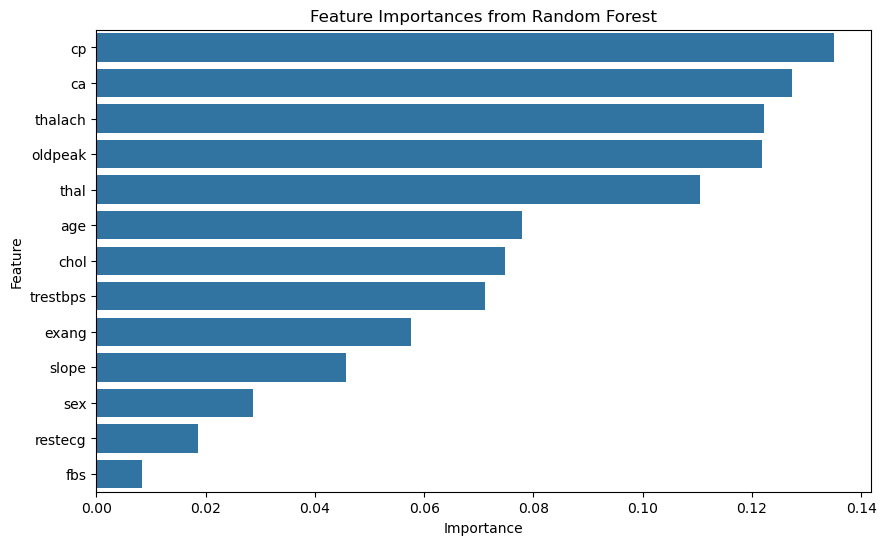

In [32]:
# Step 12: Interpret Feature Importances
# Shows which features are most important for predictions.

importances = rf_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for better visualization
feat_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by="Importance", ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feat_importance_df)
plt.title("Feature Importances from Random Forest")
plt.show()


In [34]:
# Step 13: Evaluate with Cross-Validation
# Helps get a more reliable estimate of model performance by using different train/test splits.

cv_scores = cross_val_score(rf_model, X, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())


Cross-Validation Scores: [1.         1.         1.         1.         0.98536585]
Mean CV Accuracy: 0.9970731707317073
